In [19]:
import keras

'2.3.1'

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 3s 0us/step


In [20]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [21]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 1us/step


In [22]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [23]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [27]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 385us/step - loss: 0.0050 - binary_accuracy: 0.9987 - val_loss: 0.7174 - val_binary_accuracy: 0.8656
Epoch 2/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 0.7593 - val_binary_accuracy: 0.8629
Epoch 3/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.0043 - binary_accuracy: 0.9991 - val_loss: 0.7844 - val_binary_accuracy: 0.8661
Epoch 4/20
15000/15000 [==============================] - 3s 190us/step - loss: 7.1053e-04 - binary_accuracy: 1.0000 - val_loss: 0.8175 - val_binary_accuracy: 0.8659
Epoch 5/20
15000/15000 [==============================] - 3s 178us/step - loss: 5.5342e-04 - binary_accuracy: 1.0000 - val_loss: 0.8534 - val_binary_accuracy: 0.8660
Epoch 6/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.0018 - binary_accuracy: 0.9997 - val_loss: 0.8860 

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

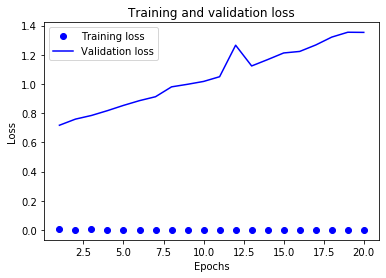

In [33]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

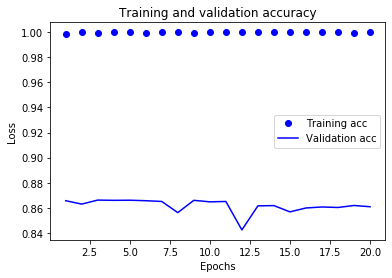

In [35]:
plt.clf() 
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 209us/step - loss: 0.4413 - accuracy: 0.82201s - l
Epoch 2/4
25000/25000 [==============================] - 3s 100us/step - loss: 0.2546 - accuracy: 0.9109
Epoch 3/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.1971 - accuracy: 0.9290
Epoch 4/4
25000/25000 [==============================] - 9s 351us/step


In [38]:
results

[0.2987300609874725, 0.8808000087738037]

## 用训练好的模型在测试集上预测

In [40]:
model.predict(x_test)

array([[0.20975268],
       [0.99975616],
       [0.92683107],
       ...,
       [0.16761103],
       [0.10825642],
       [0.6682607 ]], dtype=float32)

### 数字分类

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.datasets import mnist
# categorical_crossentropy

def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    number = 10000
    x_train = x_train[0:number]
    y_train = y_train[0:number]
    x_train = x_train.reshape(number, 28*28)
    x_test = x_test.reshape(x_test.shape[0], 28*28)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    # convert class vectors to binary class matrices
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    x_train = x_train
    x_test = x_test
    # x_test = np.random.normal(x_test)
    x_train = x_train / 255
    x_test = x_test / 255
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data()

model = Sequential()
model.add(Dense(input_dim=28*28, units=689, activation = 'sigmoid'))
model.add(Dense(units=689, activation='sigmoid'))
model.add(Dense(units=689, activation='sigmoid'))
#for i in range(10):
#    model.add(Dense(units=689,activation='sigmoid'))
model.add(Dense(units=10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
        optimizer='Adam',
        metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10)

score = model.evaluate(x_test, y_test)
print('\nTest Acc: ', score[1])


Epoch 1/10
10000/10000 [==============================] - 3s 272us/step - loss: 1.5428 - accuracy: 0.4967
Epoch 2/10
10000/10000 [==============================] - 3s 264us/step - loss: 0.4487 - accuracy: 0.8656
Epoch 3/10
10000/10000 [==============================] - 5s 474us/step - loss: 0.3235 - accuracy: 0.9029
Epoch 4/10
10000/10000 [==============================] - 5s 451us/step - loss: 0.2596 - accuracy: 0.9250
Epoch 5/10
10000/10000 [==============================] - 4s 397us/step - loss: 0.2268 - accuracy: 0.9336
Epoch 6/10
10000/10000 [==============================] - 4s 417us/step - loss: 0.2064 - accuracy: 0.9355
Epoch 7/10
10000/10000 [==============================] - 4s 401us/step - loss: 0.1823 - accuracy: 0.9472
Epoch 8/10
10000/10000 [==============================] - 4s 354us/step - loss: 0.1606 - accuracy: 0.9513
Epoch 9/10
10000/10000 [==============================] - 4s 391us/step - loss: 0.1372 - accuracy: 0.9593
Epoch 10/10
10000/10000 [=====================